In [1]:
'''
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install imbalanced-learn
!pip install shap
!pip install streamlit
!pip install plotly
'''

'\n!pip install pandas\n!pip install numpy\n!pip install matplotlib\n!pip install seaborn\n!pip install scikit-learn\n!pip install xgboost\n!pip install imbalanced-learn\n!pip install shap\n!pip install streamlit\n!pip install plotly\n'

# **1. Import Libraries:**

In [2]:
# ============================================
# Core & Data Handling
# ============================================
import pandas as pd
import numpy as np
from pathlib import Path
import pickle
import warnings
warnings.filterwarnings('ignore')

# ============================================
# Visualization
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# Machine Learning - General
# ============================================
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, recall_score, precision_score, f1_score, accuracy_score,
                              make_scorer, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay)

# ============================================
# Machine Learning - Models
# ============================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, StackingClassifier)
from xgboost import XGBClassifier
import xgboost as xgb  # Redundant (already imported above), can remove

# ============================================
# Imbalanced Data Handling
# ============================================
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ============================================
# Interpretability
# ============================================
import shap

# ============================================
# Global Configurations
# ============================================
pd.set_option('display.max_columns', None)
np.random.seed(42)

# **2. Load the Data and Initial inspection:**

**2.1 Load Dataset**

In [3]:
import pandas as pd
import os
from io import StringIO
import requests
def load_data(local_path, github_url=None):
  
    try:
        if os.path.exists(local_path):
            print(f"Data loaded successfully from Local path")
            return pd.read_csv(local_path)
        if github_url:
            print(f"File not found in local path, attempting from GitHub path")
            print(f"....")
            response = requests.get(github_url)
            response.raise_for_status()
            print(f"Data loaded successfully from GitHub path")
            return pd.read_csv(StringIO(response.text))
        print("no data")
        return None
    except Exception as e:
        print(f'Error in loading data, please verify the path or URL:')
    return None

localpath = "C:/Users/NITS/Downloads/employee_attrition_dataset_10000.csv"
github_url = "https://raw.githubusercontent.com/jaiswalnitish/Employee_attrition/refs/heads/main/employee_attrition_dataset_10000.csv"
employees = load_data(localpath, github_url)


Data loaded successfully from Local path


**2.2 Dataset Overview:**

*Structural Inspection*

In [4]:
# Shape and head
print("Dataset Dimensions:")
display(employees.shape)

print("\nFirst 5 Rows:")
display(employees.head())

# Column-wise info
print("\nData Types and Non-Null Counts:")
display(employees.info())

Dataset Dimensions:


(10000, 26)


First 5 Rows:


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,12,3,1,3,2,74,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,7,5,1,2,2,24,Yes,9,57,10,4,1,1,25,1,No
2,3,34,Female,Married,Marketing,Manager,4,11485,65,6,4,3,4,5,1,63,Yes,3,55,1,1,4,3,21,1,Yes
3,4,27,Female,Divorced,HR,Manager,4,18707,28,12,9,1,1,1,2,4,No,9,53,2,3,4,1,46,2,No
4,5,40,Male,Married,HR,Analyst,1,16398,92,3,9,1,3,4,3,62,No,1,54,11,1,1,1,43,4,No



Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int64 
 7   Monthly_Income                 10000 non-null  int64 
 8   Hourly_Rate                    10000 non-null  int64 
 9   Years_at_Company               10000 non-null  int64 
 10  Years_in_Current_Role          10000 non-null  int64 
 11  Years_Since_Last_Promotion     10000 non-null  int64 
 12  Work_Life_Balance           

None

*Missing Value Check*

In [5]:
# Missing values
missing_data = employees.isnull().sum()
print("Missing Values Per Column:")
print(missing_data)

# Handle missing data (if any)
if missing_data.any():
    employees.dropna(inplace=True) 
    print(f"Dropped rows with missing values. New shape: {employees.shape}")

Missing Values Per Column:
Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64


**2.3 Data Quality Check**

*Data duplicacy check*

In [6]:
print(f"Total duplicate rows: {employees.duplicated().sum()}")
employees.drop_duplicates(inplace=True)

print(f"Duplicate Employee ID: {employees['Employee_ID'].duplicated().sum()}")

Total duplicate rows: 0
Duplicate Employee ID: 0


*Data Consistency*

In [7]:
employees['Years_Since_Last_Promotion']=employees[['Years_Since_Last_Promotion','Years_at_Company']].min(axis=1)

#Checking categorical values
cat_cols = employees.select_dtypes(include='object').columns
print("\nCategorical Value Checks:")
for col in cat_cols:
    print(f"{col}: {employees[col].unique()}")


Categorical Value Checks:
Gender: ['Male' 'Female']
Marital_Status: ['Single' 'Divorced' 'Married']
Department: ['Finance' 'HR' 'Marketing' 'Sales' 'IT']
Job_Role: ['Manager' 'Assistant' 'Analyst' 'Executive']
Overtime: ['No' 'Yes']
Attrition: ['No' 'Yes']


**2.4 Summary of Data**

In [8]:
#data summary
print("Numerical data summary:")
display(employees.describe())

#Target variable
print("\nAttrition Distribution:")
display(employees['Attrition'].value_counts())

Numerical data summary:


,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,39.561800,2.990800,11436.716700,57.032300,14.936200,7.451300,4.047800,2.502400,3.038000,2.507700,49.588900,4.984400,44.473500,9.410200,2.493100,2.491400,2.505400,25.272000,2.516600
std,2886.89568,11.454986,1.410643,4926.528302,24.703261,8.431657,4.042903,2.782353,1.112348,1.414764,1.120833,28.801393,2.580043,8.611662,5.760335,1.120927,1.115101,1.116018,14.219474,1.113934
min,1.00000,20.000000,1.000000,3000.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,30.000000,2.000000,7182.500000,36.000000,8.000000,4.000000,2.000000,2.000000,2.000000,2.000000,25.000000,3.000000,37.000000,4.000000,1.000000,1.000000,2.000000,13.000000,2.000000
50%,5000.50000,40.000000,3.000000,11401.500000,57.000000,15.000000,7.000000,4.000000,2.000000,3.000000,3.000000,49.000000,5.000000,45.000000,9.000000,2.000000,2.000000,3.000000,25.000000,2.000000
75%,7500.25000,49.000000,4.000000,15679.500000,78.000000,22.000000,11.000000,6.000000,3.000000,4.000000,4.000000,75.000000,7.000000,52.000000,14.000000,4.000000,3.000000,3.000000,37.000000,4.000000
max,10000.00000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.000000,4.000000,5.000000,4.000000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000



Attrition Distribution:


Attrition
No     8003
Yes    1997
Name: count, dtype: int64

**2.5 Exploratory Data Analysis (EDA)**

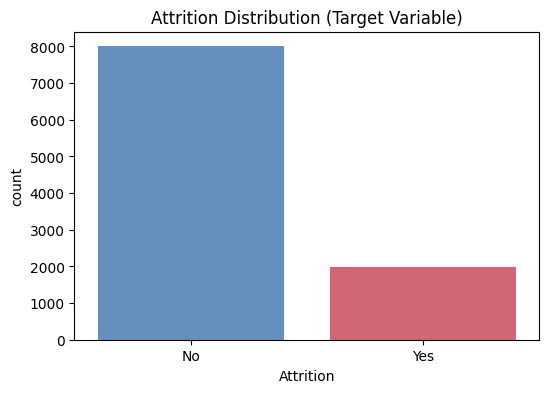

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=employees, x='Attrition', palette=['#578FCA', '#E1556A'])
plt.title("Attrition Distribution (Target Variable)")
plt.show()

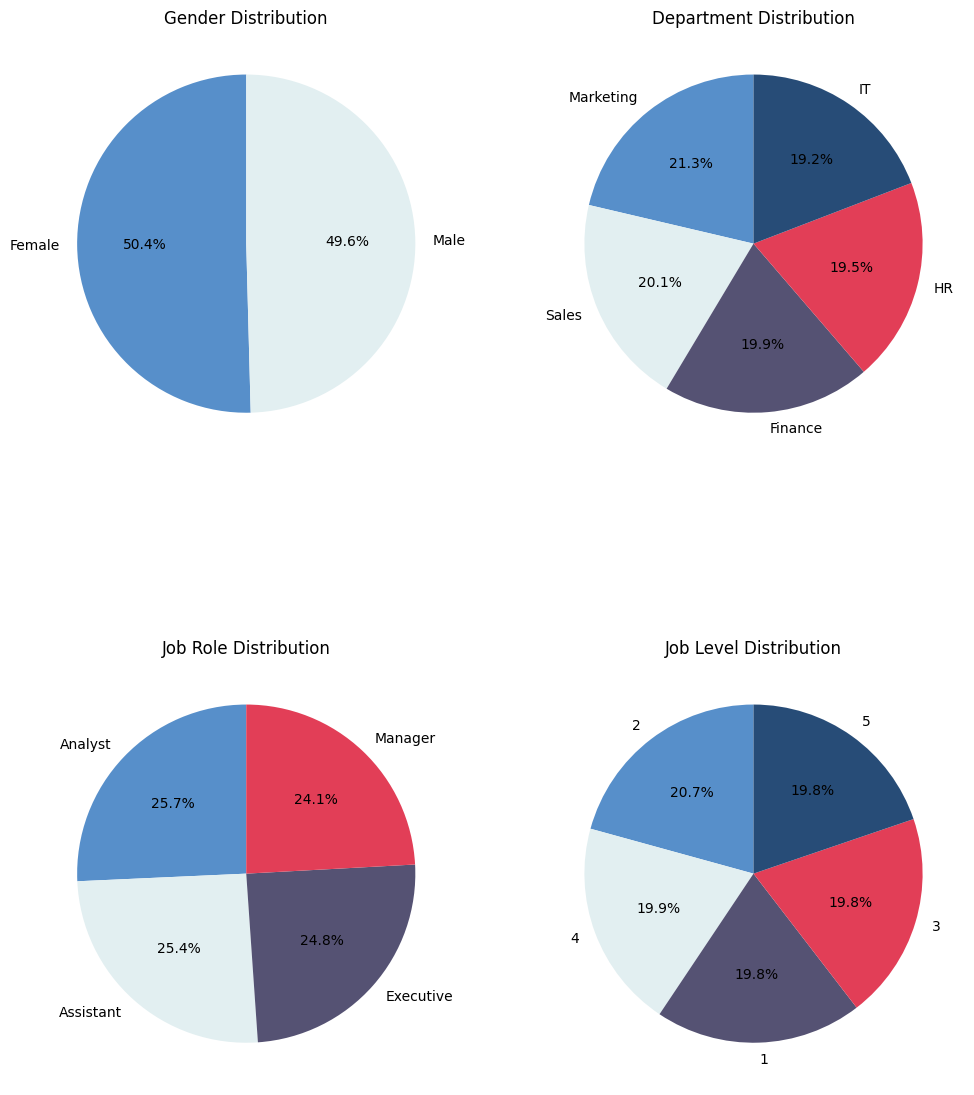

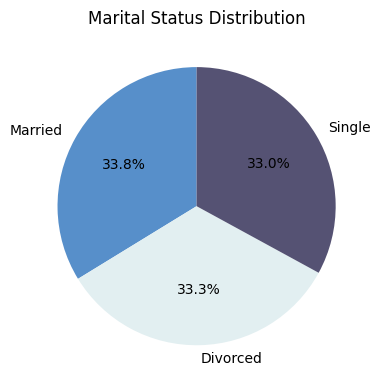

In [10]:


# Attributes to plot
attributes = ['Gender', 'Department', 'Job_Role', 'Job_Level']
titles = ['Gender Distribution', 'Department Distribution', 'Job Role Distribution', 'Job Level Distribution']
mycolor = ['#578FCA', '#E2EFF1', '#555273', '#E23E57', '#274c77']

# Create 2x2 subplot for the main attributes
figure, axis = plt.subplots(2, 2, figsize=(12, 15))

for i, attr in enumerate(attributes):
    data = employees[attr].value_counts()
    row, col = divmod(i, 2)
    axis[row, col].pie(data, labels=data.index, autopct='%1.1f%%', colors=mycolor, startangle=90)
    axis[row, col].set_title(titles[i])

# Separate plot for Marital Status
figure, axis = plt.subplots(1, 1, figsize=(4, 4))
marital_status = employees['Marital_Status'].value_counts()
axis.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%', colors=mycolor, startangle=90)
axis.set_title('Marital Status Distribution')

plt.tight_layout()
plt.show()

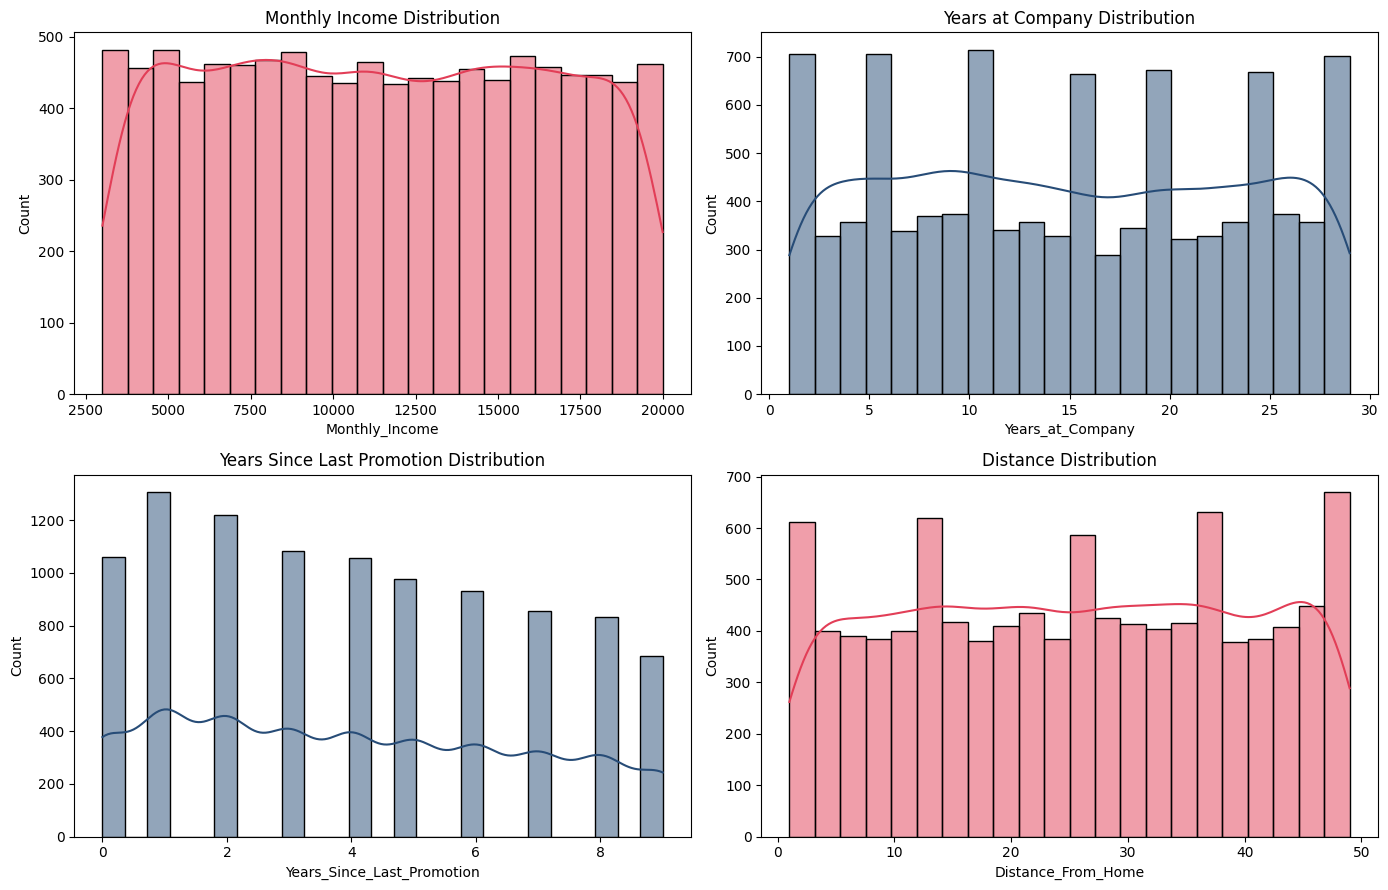

In [11]:

# Attributes and their settings
attributes = [
    ('Monthly_Income', 'Monthly Income Distribution', '#E23E57'),
    ('Years_at_Company', 'Years at Company Distribution', '#274c77'),
    ('Years_Since_Last_Promotion', 'Years Since Last Promotion Distribution', '#274c77'),
    ('Distance_From_Home', 'Distance Distribution', '#E23E57')
]

# Set up the subplot grid
figure, axis = plt.subplots(2, 2, figsize=(14, 9))

# Loop through attributes and plot
for i, (attr, title, color) in enumerate(attributes):
    row, col = divmod(i, 2)
    sns.histplot(employees[attr], ax=axis[row, col], kde=True, color=color)
    axis[row, col].set_title(title)

plt.tight_layout()
plt.show()

In [12]:
employees.groupby(["Department","Gender"])["Attrition"].count().sort_values(ascending=False)

Department  Gender
Marketing   Female    1070
            Male      1063
Sales       Male      1025
Finance     Female    1014
IT          Female    1007
HR          Male       985
Sales       Female     983
Finance     Male       976
HR          Female     968
IT          Male       909
Name: Attrition, dtype: int64

In [13]:
# For a single categorical feature (e.g., Department)
pd.crosstab(
    employees['Department'], 
    employees['Attrition'], 
    normalize='index'  # Normalize by row to show % attrition
).mul(100).round(1).astype(str) + '%'

Attrition,No,Yes
Department,,
Finance,79.1%,20.9%
HR,80.5%,19.5%
IT,79.6%,20.4%
Marketing,80.6%,19.4%
Sales,80.2%,19.8%


# **3. Data Preprocessing:**

**3.1 Handle data inconsistencies:**

In [14]:
#ensure Years since last promotion is less than or equal to year at same company
employees['Years_Since_Last_Promotion']=employees[['Years_Since_Last_Promotion','Years_at_Company']].min(axis=1)

#validate age field
employees= employees[employees['Age'] >= 18]

**3.2 Handle categorical data:**

*Label encoding (Binary features)*

In [15]:
#
binary_categorical_col1 = ['Attrition', 'Overtime']
le = LabelEncoder()
for cols in binary_categorical_col1:
    employees[cols] = le.fit_transform(employees[cols])

employees['Attrition'].value_counts()


Attrition
0    8003
1    1997
Name: count, dtype: int64

*One-hot encoding (Nominal features)*

In [16]:
nominal_categorical_cols = employees.select_dtypes(include=['object']).columns
# One-hot encode categorical columns
employees = pd.get_dummies(employees, columns=nominal_categorical_cols, drop_first=True)

In [17]:
employees=employees.astype(int)
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Employee_ID                    10000 non-null  int64
 1   Age                            10000 non-null  int64
 2   Job_Level                      10000 non-null  int64
 3   Monthly_Income                 10000 non-null  int64
 4   Hourly_Rate                    10000 non-null  int64
 5   Years_at_Company               10000 non-null  int64
 6   Years_in_Current_Role          10000 non-null  int64
 7   Years_Since_Last_Promotion     10000 non-null  int64
 8   Work_Life_Balance              10000 non-null  int64
 9   Job_Satisfaction               10000 non-null  int64
 10  Performance_Rating             10000 non-null  int64
 11  Training_Hours_Last_Year       10000 non-null  int64
 12  Overtime                       10000 non-null  int64
 13  Project_Count    

# **4. Model Preparation**

**4.1 Feature Selection**

*Validate Correlation relation*

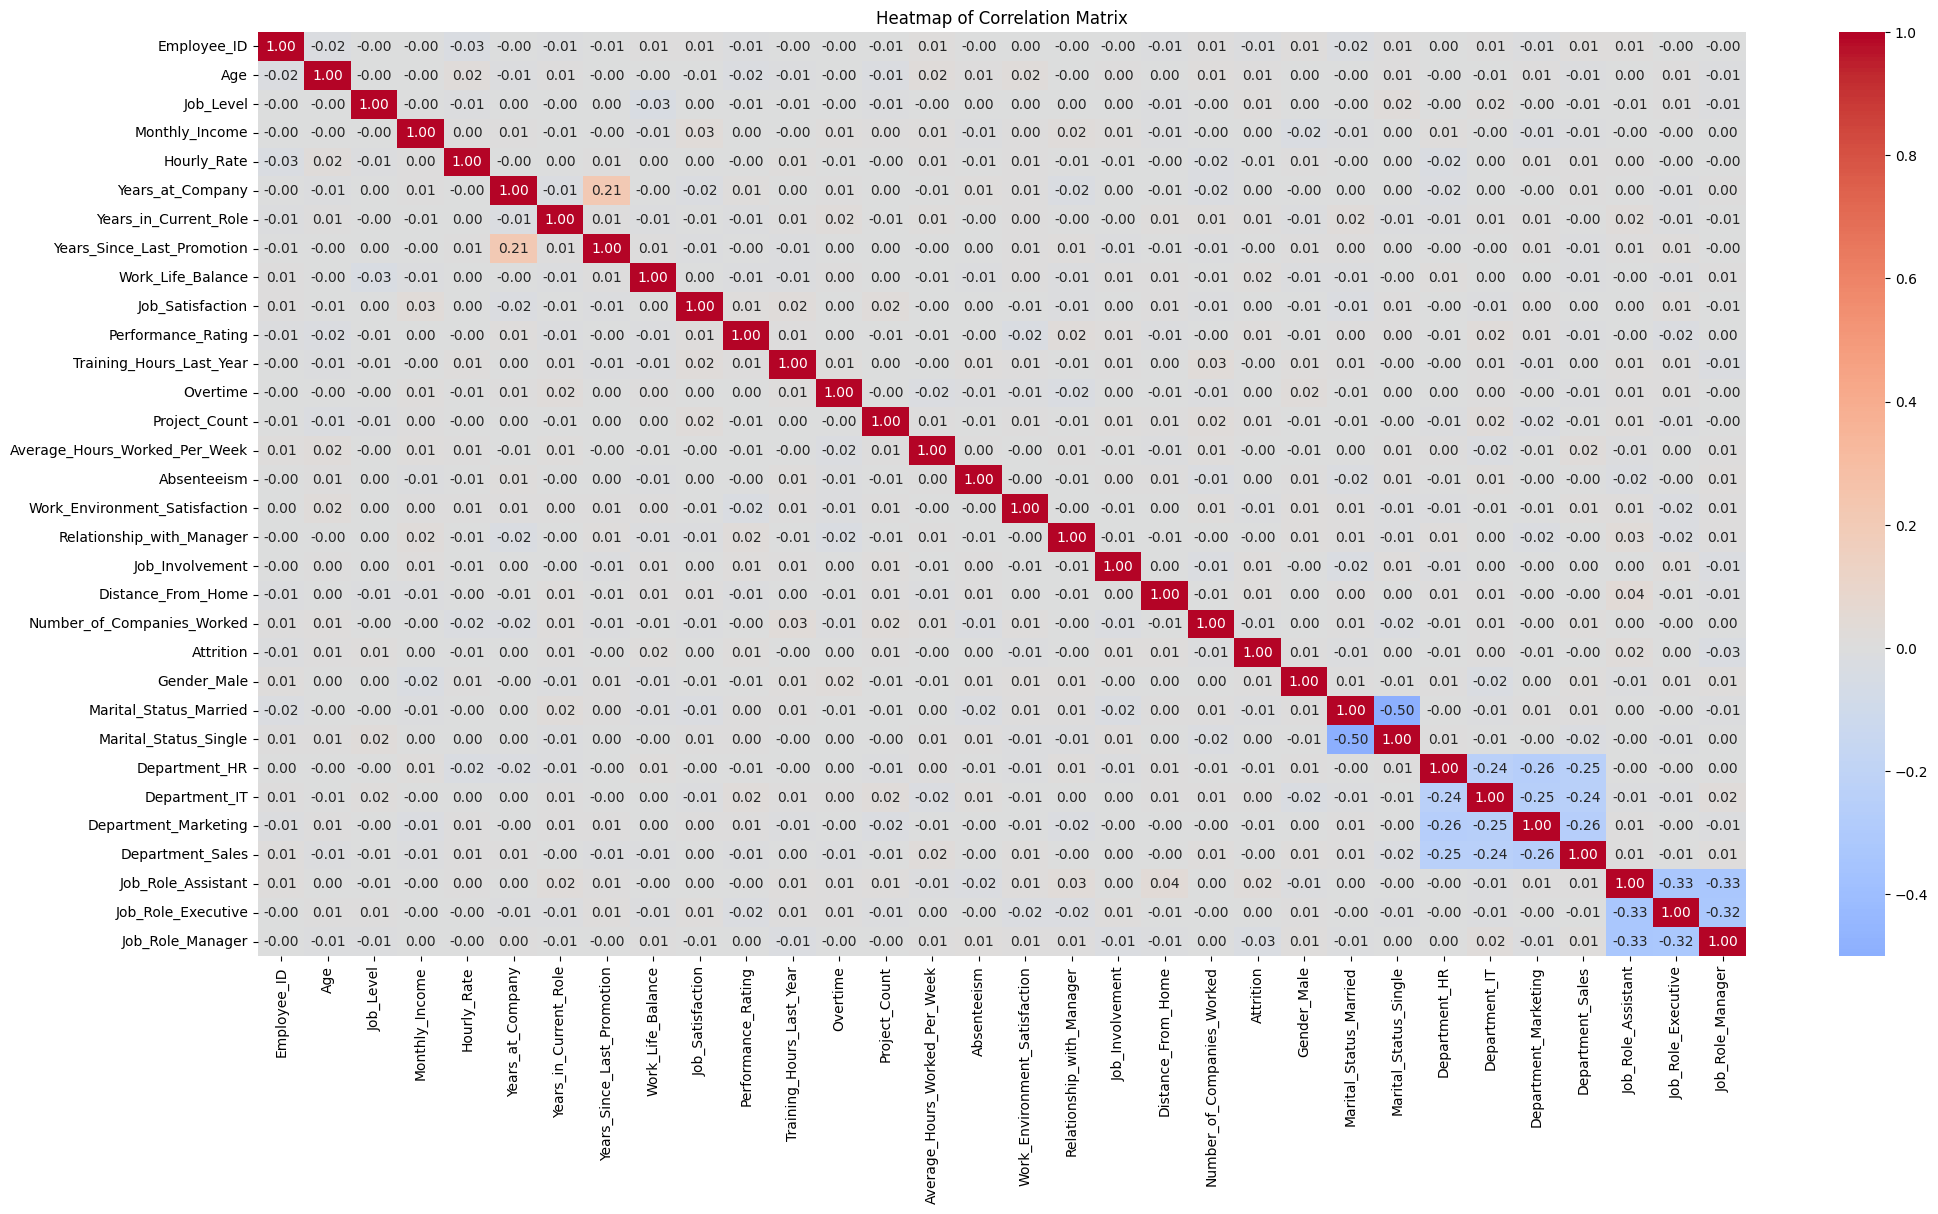

In [18]:

plt.figure(figsize=(24,12))
sns.heatmap(employees.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [19]:
#print(corr_matrix['Attrition'].sort_values(ascending=False))
employees.corr()['Attrition'].sort_values(ascending=False)

Attrition                        1.000000
Job_Role_Assistant               0.021360
Work_Life_Balance                0.015227
Job_Involvement                  0.014954
Performance_Rating               0.011856
Job_Level                        0.011415
Distance_From_Home               0.011361
Age                              0.007798
Gender_Male                      0.007448
Project_Count                    0.006802
Years_in_Current_Role            0.005120
Department_IT                    0.004687
Marital_Status_Single            0.003187
Years_at_Company                 0.002682
Overtime                         0.002537
Job_Satisfaction                 0.002142
Job_Role_Executive               0.001474
Absenteeism                      0.000514
Monthly_Income                   0.000135
Training_Hours_Last_Year        -0.000539
Years_Since_Last_Promotion      -0.001390
Department_Sales                -0.001872
Average_Hours_Worked_Per_Week   -0.002457
Relationship_with_Manager       -0

**4.2 Feature selection**

In [20]:
drop_cols = {
    "HR_Only": [
        'Employee_ID', 'Age', 'Monthly_Income', 'Hourly_Rate', 'Project_Count',
        'Training_Hours_Last_Year', 'Average_Hours_Worked_Per_Week', 'Absenteeism',
        'Number_of_Companies_Worked',
        'Work_Life_Balance', 'Job_Satisfaction','Work_Environment_Satisfaction',
        'Relationship_with_Manager', 'Job_Involvement'  
    ],
    "HR_Plus_Engagement": [
        'Employee_ID', 'Age', 'Monthly_Income', 'Hourly_Rate', 'Project_Count',
        'Training_Hours_Last_Year', 'Average_Hours_Worked_Per_Week', 'Absenteeism',
        'Number_of_Companies_Worked'        # Only basic columns to drop (retain engagement features)
    ]
}

In [21]:
#**4.3 Train-Test Split:**
def data_preparation(df, scenario):
    """
    Prepares dataset for specified scenario with proper:
    - Feature selection
    - Train-test splitting
    - SMOTE resampling
    - Feature scaling
    """
    # Feature selection
    df_prepped = df.drop(columns=drop_cols[scenario])
    
    # Separate features and target
    X = df_prepped.drop(columns=['Attrition'])
    y = df_prepped['Attrition']
    X,y = SMOTE(sampling_strategy='minority', random_state=42).fit_resample(X, y)
    # Train-test split (stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        stratify=y, 
        random_state=42
    )
    
    model_data_dir = Path('models/')
    model_data_dir.mkdir(parents=True, exist_ok=True)
    X_test.to_csv(model_data_dir / 'X_test.csv', index=False)

    # Scale features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return {
        'X_train': X_train,
        'X_test': X_test,
        'X_train_scaled': X_train_scaled,
        'X_test_scaled': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'feature_names': X.columns,
        'scaler': scaler
    }
#print(f"Class balance in train: {y_train.value_counts(normalize=True)}")
#print(f"Class balance in test: {y_test.value_counts(normalize=True)}")

In [22]:
def init_models(scale_pos_weight=None):
    """Initialize all models with scenario-specific parameters"""
    models = {}
    
    # Logistic Regression
    models["Logistic_Regression"] = LogisticRegression(
        class_weight='balanced',
        max_iter=1000,
        solver='liblinear',
        random_state=42,
    )
    
    # Random Forest
    models["Random_Forest"] = RandomForestClassifier(
        class_weight='balanced',
        max_depth=5,
        n_estimators=150,
        random_state=42
    )
    
    # Basic XGBoost
    models["XGBoost"] = XGBClassifier(
        eval_metric='aucpr',
        max_depth=5,
        random_state=42,
        scale_pos_weight=scale_pos_weight if scale_pos_weight else 1
    )
    
    # Tuned XGBoost
    models["XGBoost_Tuned"] = XGBClassifier(
        learning_rate=0.05,
        max_depth=8,
        n_estimators=1000,
        reg_alpha=0.1,
        reg_lambda=1.0,
        gamma=0.1,
        early_stopping_rounds=10,
        random_state=42,
        scale_pos_weight=scale_pos_weight if scale_pos_weight else 1
    )
    
    # Stacked Model
    models["Stacked_Model"] = StackingClassifier(
        estimators=[
            ('rf', models["Random_Forest"]),
            ('xgb', models["XGBoost"])
        ],
        final_estimator=LogisticRegression(
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        ),
        cv=5
    )
    
    return models

In [23]:
# ============================================
# 3. Model Training & Evaluation
# ============================================

def train_and_evaluate(models, data, scenario_name):
    """Handles proper data scaling per model type"""
    results = {}

    for name, model in models.items():
        print(f"\n{'='*50}\n{scenario_name} - Training {name}\n{'='*50}")

        # Select proper data based on model type
        if name == "Logistic_Regression":
            X_train = data['X_train_scaled']
            X_test = data['X_test_scaled']
        else:
            X_train = data['X_train']
            X_test = data['X_test']

        # Special handling for XGBoost early stopping
        if 'XGBoost' in name:
            model.fit(
                X_train, data['y_train'],
                eval_set=[(X_test, data['y_test'])],
                verbose=100
            )
        else:
            model.fit(X_train, data['y_train'])

        # Predictions (use correct X_test version)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None

        # Store metrics
        results[name] = {
            'precision': precision_score(data['y_test'], y_pred, pos_label=1),
            'recall': recall_score(data['y_test'], y_pred, pos_label=1),
            'accuracy': accuracy_score(data['y_test'], y_pred),
            'roc_auc': roc_auc_score(data['y_test'], y_proba) if y_proba is not None else None,
            'f1': f1_score(data['y_test'], y_pred, pos_label=1)
        }
        
        print("\nClassification Report:")
        print(classification_report(data['y_test'], y_pred))
        
        # For SHAP, we'll use the unscaled data (even if model was trained on scaled)
        if name == "XGBoost_Tuned":  # Or whichever model you want SHAP for
            global final_model, X_test_shap
            final_model = model
            X_test_shap = data['X_test']  # SHAP uses original feature values

    return pd.DataFrame(results).T


In [24]:
# ============================================
# 4. Scenario Comparison Workflow
# ============================================

# Prepare both datasets
hr_data = data_preparation(employees, "HR_Only")
hr_eng_data = data_preparation(employees, "HR_Plus_Engagement")

# Initialize models with class weights
def calculate_scale_pos_weight(y_train):
    """Safely calculate class weight ratio"""
    if y_train is None:
        return None
    # Convert to numpy array if it's a pandas Series
    y_train_values = y_train.values if hasattr(y_train, 'values') else y_train
    return sum(y_train_values == 0) / sum(y_train_values == 1)

models_hr = init_models(calculate_scale_pos_weight(hr_data['y_train']))
models_hr_eng = init_models(calculate_scale_pos_weight(hr_eng_data['y_train']))

# Ensure X_test is a DataFrame with feature names for both scenarios
if not isinstance(hr_data['X_test'], pd.DataFrame):
    hr_data['X_test'] = pd.DataFrame(hr_data['X_test'], columns=hr_data['feature_names'])
if not isinstance(hr_eng_data['X_test'], pd.DataFrame):
    hr_eng_data['X_test'] = pd.DataFrame(hr_eng_data['X_test'], columns=hr_eng_data['feature_names'])

# Also ensure X_train is a DataFrame with feature names for both scenarios
if not isinstance(hr_data['X_train'], pd.DataFrame):
    hr_data['X_train'] = pd.DataFrame(hr_data['X_train'], columns=hr_data['feature_names'])
if not isinstance(hr_eng_data['X_train'], pd.DataFrame):
    hr_eng_data['X_train'] = pd.DataFrame(hr_eng_data['X_train'], columns=hr_eng_data['feature_names'])

# Train and evaluate for both scenarios
hr_results = train_and_evaluate(models_hr, hr_data, "HR_Only")
hr_eng_results = train_and_evaluate(models_hr_eng, hr_eng_data, "HR_Plus_Engagement")


HR_Only - Training Logistic_Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1601
           1       0.78      0.71      0.75      1601

    accuracy                           0.76      3202
   macro avg       0.76      0.76      0.76      3202
weighted avg       0.76      0.76      0.76      3202


HR_Only - Training Random_Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1601
           1       0.79      0.71      0.75      1601

    accuracy                           0.76      3202
   macro avg       0.76      0.76      0.76      3202
weighted avg       0.76      0.76      0.76      3202


HR_Only - Training XGBoost
[0]	validation_0-aucpr:0.75601
[99]	validation_0-aucpr:0.87724

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1601


In [25]:
# 1. First prepare your data
'''from sklearn.model_selection import cross_validate


data = data_preparation(employees, "HR_Plus_Engagement")  # Or "HR_Plus_Engagement"

# 2. Now you can access the prepared data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# 3. Define your models dictionary (if not already defined)
models = {
    'Random_Forest': RandomForestClassifier(
        class_weight='balanced_subsample',
        max_depth=5,
        random_state=42
    ),
    # Add other models as needed...
}

# 4. Now run cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'recall': make_scorer(recall_score, pos_label=1),  # Attrition=Yes
    'balanced_accuracy': 'balanced_accuracy'
}

results = cross_val_score(
    models['Random_Forest'], 
    X_train,  # Now properly defined
    y_train,  # Now properly defined
    cv=cv,
    scoring='recall',  # Focus on churn detection
    n_jobs=-1          # Use all CPU cores
)

print(f"Random Forest - Mean Recall (Class 1): {results.mean():.2f} ± {results.std():.2f}")

# For more comprehensive evaluation:
cv_results = cross_validate(
    models['Random_Forest'],
    X_train,
    y_train,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    return_train_score=True
)

print("\nFull CV Results:")
print(f"Test Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"Test Balanced Accuracy: {cv_results['test_balanced_accuracy'].mean():.2f} ± {cv_results['test_balanced_accuracy'].std():.2f}")
'''

'from sklearn.model_selection import cross_validate\n\n\ndata = data_preparation(employees, "HR_Plus_Engagement")  # Or "HR_Plus_Engagement"\n\n# 2. Now you can access the prepared data\nX_train = data[\'X_train\']\ny_train = data[\'y_train\']\nX_test = data[\'X_test\']\ny_test = data[\'y_test\']\n\n# 3. Define your models dictionary (if not already defined)\nmodels = {\n    \'Random_Forest\': RandomForestClassifier(\n        class_weight=\'balanced_subsample\',\n        max_depth=5,\n        random_state=42\n    ),\n    # Add other models as needed...\n}\n\n# 4. Now run cross-validation\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\nscoring = {\n    \'recall\': make_scorer(recall_score, pos_label=1),  # Attrition=Yes\n    \'balanced_accuracy\': \'balanced_accuracy\'\n}\n\nresults = cross_val_score(\n    models[\'Random_Forest\'], \n    X_train,  # Now properly defined\n    y_train,  # Now properly defined\n    cv=cv,\n    scoring=\'recall\',  # Focus on churn dete

In [26]:
# ============================================
# 5. Results Comparison
# ============================================

def compare_results(hr_df, hr_eng_df):
    """Generate side-by-side comparison with deltas"""
    comparison = pd.concat({
        'HR_Only': hr_df,
        'HR_Plus_Engagement': hr_eng_df
    }, axis=1)
    
    # Calculate deltas
    for metric in ['precision', 'recall', 'accuracy', 'roc_auc']:
        comparison[('Delta', metric)] = (
            comparison[('HR_Plus_Engagement', metric)] - 
            comparison[('HR_Only', metric)]
        )
    
    # Format for display
    return comparison.sort_values(
        by=[('HR_Plus_Engagement', 'recall')], 
        ascending=False
    )

# Generate final comparison
results_comparison = compare_results(hr_results, hr_eng_results)
print("\nFinal Comparison:")
display(results_comparison.style.background_gradient(
    cmap='RdYlGn', 
    subset=[col for col in results_comparison.columns if 'Delta' in col],
    vmin=-0.1, 
    vmax=0.1
))


Final Comparison:


================================
==============================================
================================

## New Section ShAP

[0]	validation_0-aucpr:0.79624
[1]	validation_0-aucpr:0.82975
[2]	validation_0-aucpr:0.83373
[3]	validation_0-aucpr:0.84553
[4]	validation_0-aucpr:0.85345
[5]	validation_0-aucpr:0.85375
[6]	validation_0-aucpr:0.85720
[7]	validation_0-aucpr:0.85878
[8]	validation_0-aucpr:0.85975
[9]	validation_0-aucpr:0.86171
[10]	validation_0-aucpr:0.86173
[11]	validation_0-aucpr:0.86329
[12]	validation_0-aucpr:0.86440
[13]	validation_0-aucpr:0.86388
[14]	validation_0-aucpr:0.86476
[15]	validation_0-aucpr:0.86567
[16]	validation_0-aucpr:0.86630
[17]	validation_0-aucpr:0.86682
[18]	validation_0-aucpr:0.86720
[19]	validation_0-aucpr:0.86783
[20]	validation_0-aucpr:0.86827
[21]	validation_0-aucpr:0.86865
[22]	validation_0-aucpr:0.86966
[23]	validation_0-aucpr:0.86987
[24]	validation_0-aucpr:0.87032
[25]	validation_0-aucpr:0.87125
[26]	validation_0-aucpr:0.87194
[27]	validation_0-aucpr:0.87233
[28]	validation_0-aucpr:0.87263
[29]	validation_0-aucpr:0.87252
[30]	validation_0-aucpr:0.87284
[31]	validation_0-

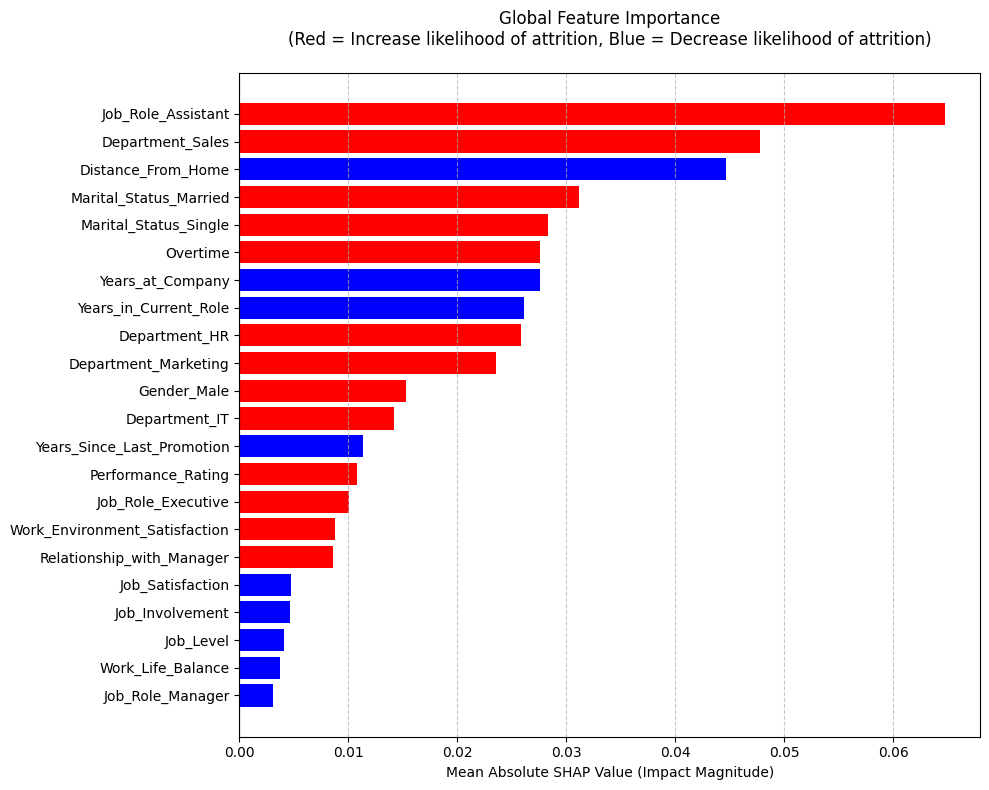


DEPARTMENT-SPECIFIC ANALYSIS

HR Department Insights:


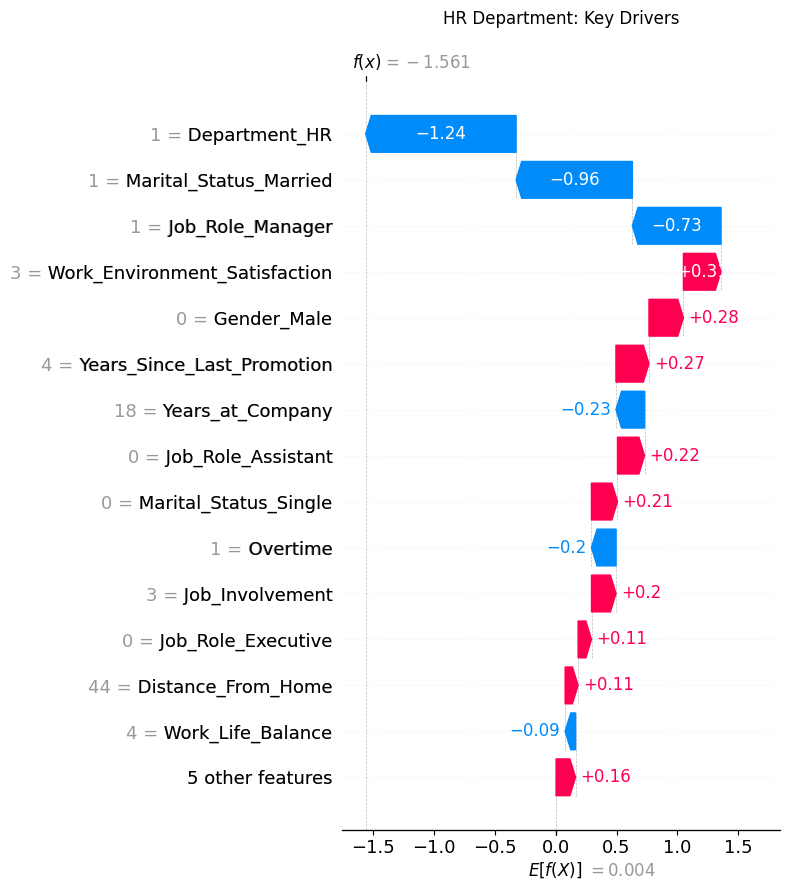


IT Department Insights:


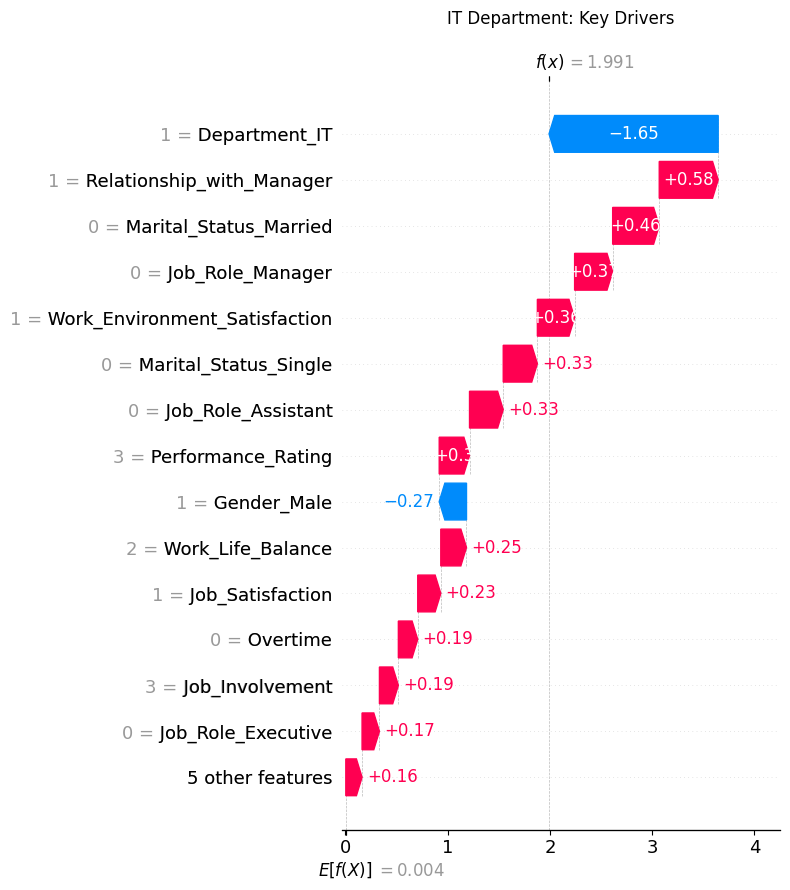


Marketing Department Insights:


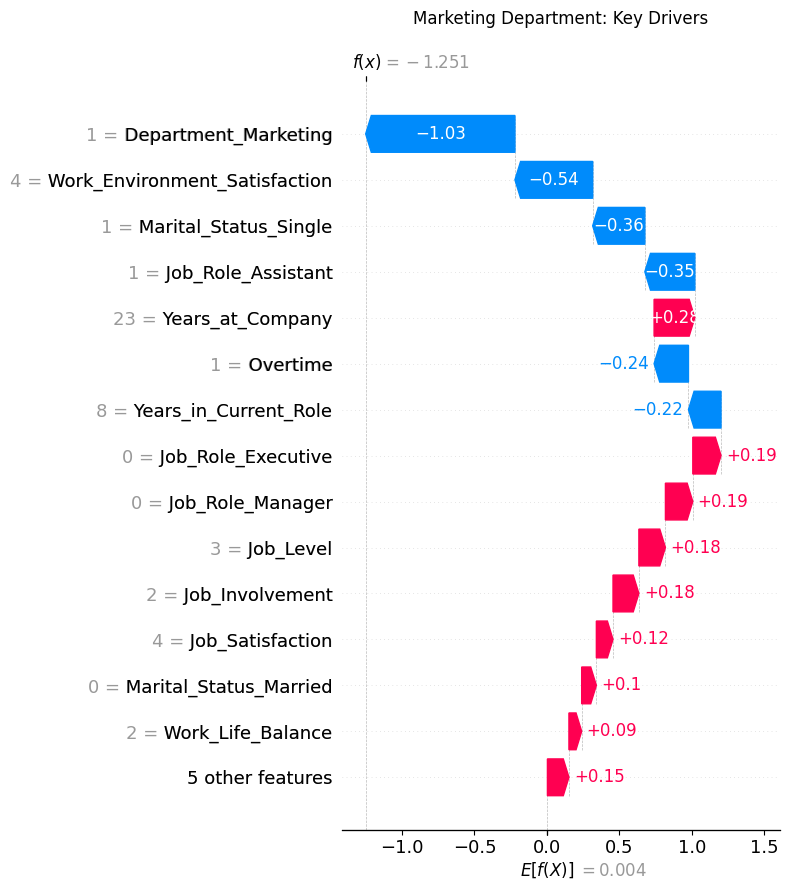


Sales Department Insights:


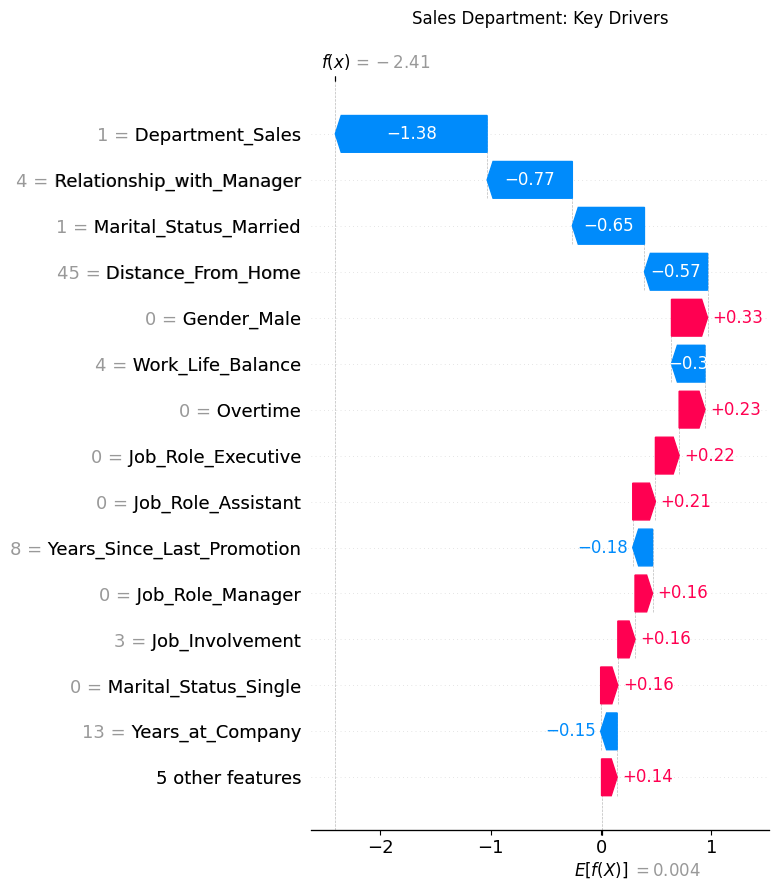


ACTIONABLE INSIGHTS

Top Global Attrition Drivers:
- Higher Marital_Status_Single increases attrition risk company-wide
- Higher Job_Role_Executive increases attrition risk company-wide
- Higher Marital_Status_Married increases attrition risk company-wide

Special HR Department Findings:
- Higher Department_HR increases attrition risk in this segment
- Higher Marital_Status_Single increases attrition risk in this segment

Special IT Department Findings:
- Higher Department_IT increases attrition risk in this segment
- Higher Job_Role_Manager reduces attrition risk in this segment

Special Marketing Department Findings:
- Higher Department_Marketing increases attrition risk in this segment
- Higher Job_Role_Executive increases attrition risk in this segment

Special Sales Department Findings:
- Higher Department_Sales increases attrition risk in this segment
- Higher Job_Role_Assistant increases attrition risk in this segment


In [27]:

data = hr_eng_data  # ✅ restrict analysis to HR_Plus_Engagement
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
feature_names = data['feature_names']

# Initialize JS visualization
shap.initjs()

scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
# 1. Train model (assuming X_train, y_train, X_test, y_test are defined)
final_model = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.05,
    max_depth=8,
    min_child_weight=1,
    n_estimators=1000,
    subsample=0.9,
    scale_pos_weight=scale_pos_weight,
    eval_metric='aucpr',
    early_stopping_rounds=10,
    random_state=42,
    reg_alpha=0.1,
    reg_lambda=1.0,
    gamma=0.1
)

final_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# 2. Create SHAP explainer and calculate values
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test)

# Handle different SHAP output formats
if hasattr(shap_values, 'values'):
    shap_array = shap_values.values
else:
    shap_array = shap_values

if isinstance(shap_array, list):
    shap_array = shap_array[1]  # For binary classification

# ============================================
# 1. GLOBAL FEATURE IMPORTANCE
# ============================================
print("\n" + "="*50)
print("GLOBAL FEATURE IMPORTANCE")
#print("="*50)

mean_shap = pd.DataFrame(shap_array, columns=data['feature_names']).mean()
mean_shap_abs = mean_shap.abs()
sorted_features = mean_shap_abs.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_features.index,
                sorted_features.values,
                color=mean_shap[sorted_features.index].apply(
                    lambda x: 'red' if x > 0 else 'blue'))

plt.title("Global Feature Importance\n(Red = Increase likelihood of attrition, Blue = Decrease likelihood of attrition)", pad=20)
plt.xlabel("Mean Absolute SHAP Value (Impact Magnitude)")
plt.axvline(0, color='black', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# ============================================
# 2. DEPARTMENT-SPECIFIC ANALYSIS
# ============================================
# 3. Department-Specific Analysis (Fixed)
print("\n" + "="*50)
print("DEPARTMENT-SPECIFIC ANALYSIS")
print("="*50)

departments = ['HR', 'IT', 'Marketing', 'Sales']

for dept in departments:
    dept_col = f'Department_{dept}'
    if dept_col in data['feature_names']:
        dept_idx = list(data['feature_names']).index(dept_col)
        dept_mask = X_test.iloc[:, dept_idx] == 1

        if sum(dept_mask) > 20:  # Minimum samples threshold
            print(f"\n{dept} Department Insights:")

            # Get indices of non-department features and current department
            non_dept_indices = [i for i, name in enumerate(data['feature_names'])
                               if not name.startswith('Department_')]
            current_dept_index = list(data['feature_names']).index(dept_col)

            # Filter SHAP values and features for this department
            filtered_indices = non_dept_indices + [current_dept_index]
            filtered_shap = shap_array[dept_mask].iloc[0, filtered_indices] if isinstance(shap_array[dept_mask], pd.DataFrame) else shap_array[dept_mask][0][filtered_indices]
            filtered_features = [data['feature_names'][i] for i in filtered_indices]
            filtered_values = X_test[dept_mask].iloc[0, filtered_indices]

            # Create waterfall plot
            shap.plots.waterfall(
                shap.Explanation(
                    values=filtered_shap,
                    base_values=explainer.expected_value,
                    feature_names=filtered_features,
                    data=filtered_values
                ),
                max_display=15,
                show=False
            )
            plt.title(f"{dept} Department: Key Drivers", pad=20)
            plt.tight_layout()
            plt.show()


# ============================================
# 3. ACTIONABLE INSIGHTS
# ============================================
print("\n" + "="*50)
print("ACTIONABLE INSIGHTS")
print("="*50)

def generate_insights(feature, mask, direction):
    effect = "increases" if direction > 0 else "reduces"
    segment = "company-wide" if mask is None else "in this segment"
    return f"Higher {feature} {effect} attrition risk {segment}"

# Global insights
global_top_features = pd.DataFrame(shap_array, columns=data['feature_names']).abs().mean().sort_values(ascending=False).head(3)
print("\nTop Global Attrition Drivers:")
for feature in global_top_features.index:
    direction = np.mean(shap_array[:, data['feature_names'].get_loc(feature)])
    print(f"- {generate_insights(feature, None, direction)}")

# Department-specific insights
for dept in departments:
    dept_col = f'Department_{dept}'
    # X_test is a DataFrame, so we check in feature_names
    if dept_col in data['feature_names']:
        dept_idx = list(data['feature_names']).index(dept_col)
        dept_mask = X_test.iloc[:, dept_idx] == 1
        if dept_mask.sum() > 10:
            dept_shap = shap_array[dept_mask.values]
            dept_top_features = pd.DataFrame(dept_shap, columns=data['feature_names']).abs().mean().sort_values(ascending=False).head(2)
            print(f"\nSpecial {dept} Department Findings:")
            for feature in dept_top_features.index:
                direction = np.mean(shap_array[:, list(data['feature_names']).index(feature)])
                print(f"- {generate_insights(feature, dept_mask, direction)}")

# streamlit

Serialization and Deserialization

In [28]:
#create path to save models and data files (if not already created)
model_data_dir = Path('')
model_data_dir.mkdir(parents=True, exist_ok=True)  # Create directory and parents if needed

# 1. Save model
model_path = model_data_dir / 'xgboost_attrition_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(final_model, f)

# 2. Save data files
# CSV files (overwrite if exists)
pd.DataFrame(X_test, columns=data['feature_names']).to_csv(model_data_dir / 'X_test.csv', index=False)
y_test.to_csv(model_data_dir / 'y_test.csv', index=False)

# NumPy arrays
y_pred = final_model.predict(X_test)
np.save(model_data_dir / 'y_pred.npy', y_pred)
if hasattr(final_model, 'predict_proba'):
    y_proba = final_model.predict_proba(X_test)
    np.save(model_data_dir / 'y_proba.npy', y_proba)

# XGBoost-specific versions
pd.DataFrame(X_test, columns=data['feature_names']).to_csv(model_data_dir / 'X_test_xgboost.csv', index=False)
y_test.to_csv(model_data_dir / 'y_test_xgboost.csv', index=False)
np.save(model_data_dir / 'xgboost_y_pred.npy', y_pred)

print(f"All files saved to: {model_data_dir.resolve()}")

All files saved to: C:\Users\NITS\Downloads\models
